In [1]:
import cv2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [11]:
img = cv2.imread('./test_images/neymar2.jpg')
img.shape

(600, 624, 3)

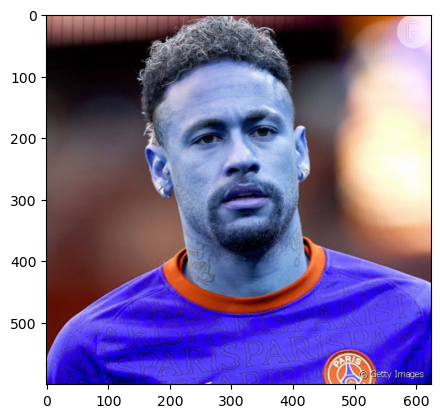

In [12]:
plt.imshow(img)

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(600, 624)

In [14]:
gray

array([[135, 137, 137, ..., 252, 252, 252],
       [135, 137, 137, ..., 251, 252, 252],
       [135, 136, 136, ..., 251, 252, 252],
       ...,
       [111, 103,  89, ...,  31,  33,  37],
       [101,  95,  85, ...,  30,  29,  31],
       [ 93,  90,  82, ...,  29,  27,  28]], dtype=uint8)

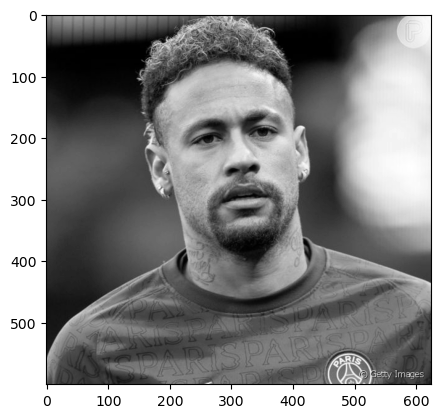

In [15]:
plt.imshow(gray, cmap='gray')

In [16]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[170,  81, 287, 287]])

In [17]:
(x,y,w,h) = faces[0]
x,y,w,h

(170, 81, 287, 287)

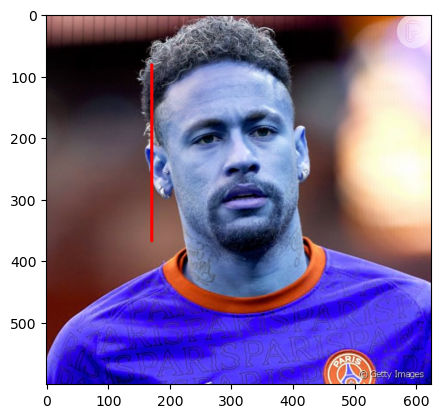

In [18]:
face_img = cv2.rectangle(img,(x,y),(x+2,y+h),(255,0,0),2)
plt.imshow(face_img)

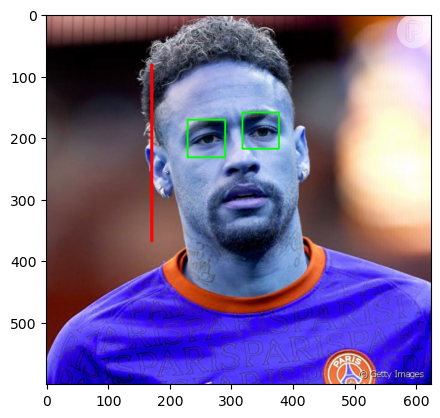

In [19]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+2,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

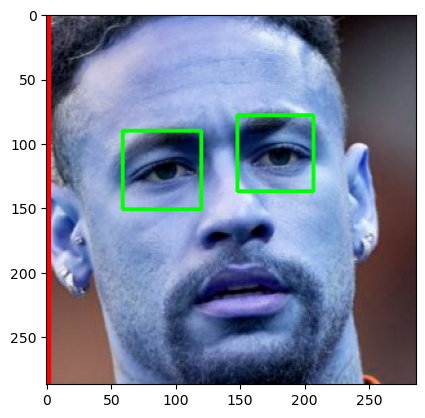

In [20]:
plt.imshow(roi_color, cmap='gray')

In [42]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

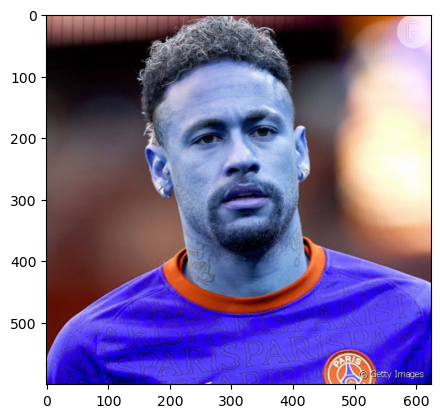

In [22]:
original_image = cv2.imread('./test_images/neymar2.jpg')
plt.imshow(original_image)

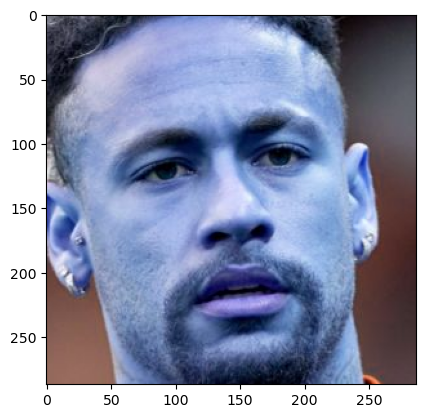

In [27]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/neymar2.jpg')
plt.imshow(cropped_image)

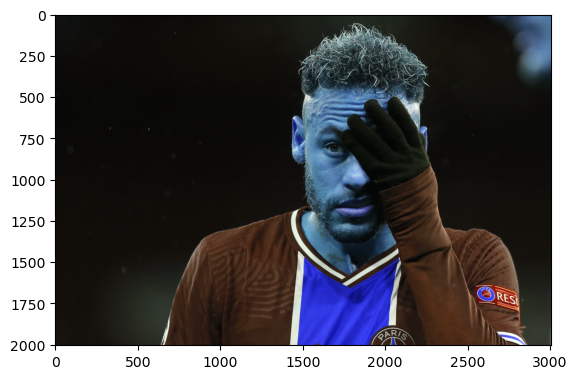

In [28]:
image_obstructed = cv2.imread('./test_images/neymar3.jpg')
plt.imshow(image_obstructed)

In [29]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/neymar3.jpg')
cropped_image_no_2_eyes

In [31]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [32]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [33]:
img_dirs

['./dataset/adriana_lima',
 './dataset/kim_da_mi',
 './dataset/messi',
 './dataset/mike_tyson',
 './dataset/neymar']

In [34]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [60]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

adriana_lima
kim_da_mi
messi
mike_tyson
neymar


In [61]:
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'adriana_lima': ['./dataset/cropped/adriana_lima/adriana_lima1.png',
  './dataset/cropped/adriana_lima/adriana_lima2.png',
  './dataset/cropped/adriana_lima/adriana_lima3.png',
  './dataset/cropped/adriana_lima/adriana_lima4.png',
  './dataset/cropped/adriana_lima/adriana_lima5.png',
  './dataset/cropped/adriana_lima/adriana_lima6.png',
  './dataset/cropped/adriana_lima/adriana_lima7.png',
  './dataset/cropped/adriana_lima/adriana_lima8.png',
  './dataset/cropped/adriana_lima/adriana_lima9.png',
  './dataset/cropped/adriana_lima/adriana_lima10.png',
  './dataset/cropped/adriana_lima/adriana_lima11.png',
  './dataset/cropped/adriana_lima/adriana_lima12.png',
  './dataset/cropped/adriana_lima/adriana_lima13.png',
  './dataset/cropped/adriana_lima/adriana_lima14.png',
  './dataset/cropped/adriana_lima/adriana_lima15.png',
  './dataset/cropped/adriana_lima/adriana_lima16.png',
  './dataset/cropped/adriana_lima/adriana_lima17.png',
  './dataset/cropped/adriana_lima/adriana_lima18.png',
  '

In [62]:
import pywt

In [67]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /=255;
    #compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 255;
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *=255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

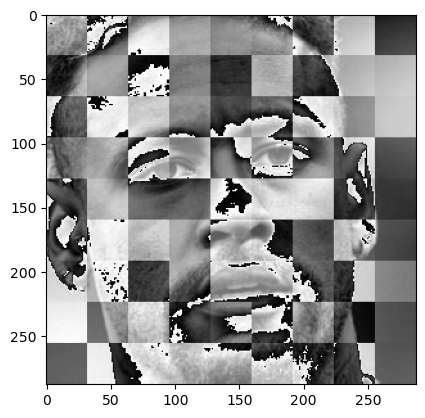

In [64]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [65]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'adriana_lima': 0, 'kim_da_mi': 1, 'messi': 2, 'mike_tyson': 3, 'neymar': 4}

In [69]:
X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [71]:
len(X)

173

In [72]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(173, 4096)

In [73]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9772727272727273

In [85]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [86]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [88]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.806462,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.658769,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.813538,{'logisticregression__C': 1}


In [89]:
best_estimators['svm'].score(X_test, y_test)

0.9545454545454546

In [90]:
best_estimators['random_forest'].score(X_test, y_test)

0.7727272727272727

In [91]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8863636363636364

In [92]:
best_clf = best_estimators['svm']

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[18,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 1,  0,  6,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  7]], dtype=int64)

<AxesSubplot:>

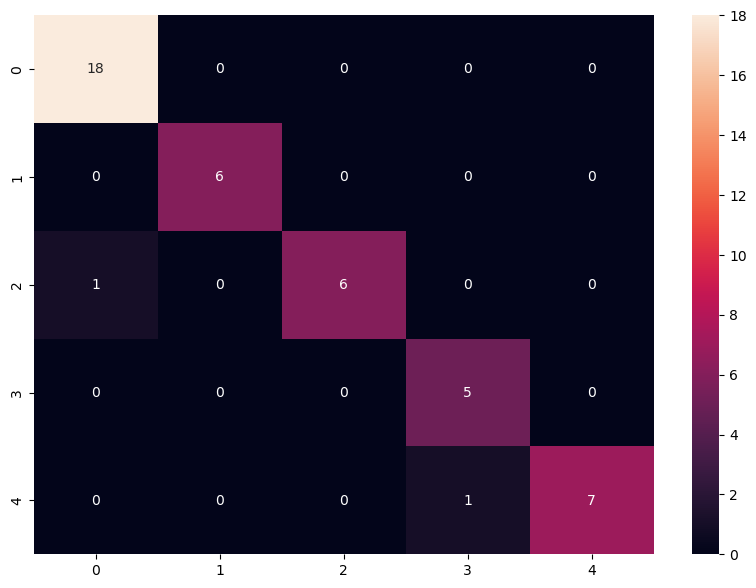

In [95]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)

In [96]:
import joblib

In [97]:
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [98]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))